# 기술통계 연습문제(1) - 풀이

## 패키지 참조

In [1]:
import sys
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt

### 폰트 및 그래프 크기 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

## 문제 1

### 데이터 가져오기

In [3]:
df1 = read_excel("https://data.hossam.kr/D02/kings_life.xlsx", index_col='왕')
df1

,수명
왕,
태조,73
정종,62
태종,45
세종,53
문종,38
단종,16
세조,51
예종,28
성종,37


### 수명에 대한 기술 통계량

In [4]:
df1.describe()

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


### 상자그림

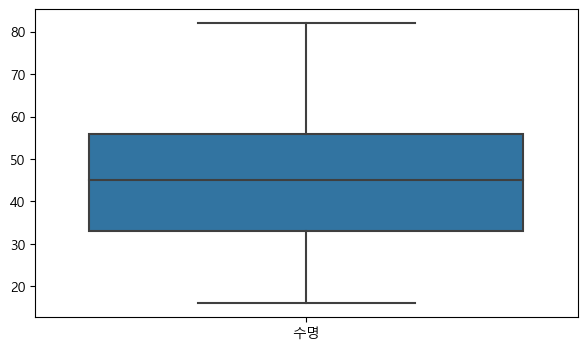

In [5]:
plt.figure()
sb.boxplot(data=df1)
plt.show()
plt.close()

### 알 수 있는 사실

1. 총 27명의 왕에 대한 수명은 16~82 사이의 범위를 갖고 있으며 평균 수명은 46세이다.
1. 중앙값은 45이며 1사분위 수는 33, 3사분위 수는 56으로 나타났다.
1. 상자그림을 통해 이상치는 없음을 확인할 수 있다.

## 문제 2

### 데이터 가져오기

In [6]:
df2 = read_excel("https://data.hossam.kr/D02/stock.xlsx")
df2

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


### 각각 필요한 데이터를 추출하여 분석하는 경우

In [7]:
df2_1 = df2.query("구분=='K'")
df2_1.reset_index(drop=True, inplace=True)
df2_1

,구분,주가
0,K,165
1,K,147
2,K,135
3,K,161
4,K,102
5,K,165
6,K,170
7,K,173
8,K,173
9,K,145


In [8]:
df2_2 = df2.query("구분=='F'")
df2_2.reset_index(drop=True, inplace=True)
df2_2

,구분,주가
0,F,120
1,F,144
2,F,147
3,F,235
4,F,161
5,F,139
6,F,150
7,F,157
8,F,139
9,F,150


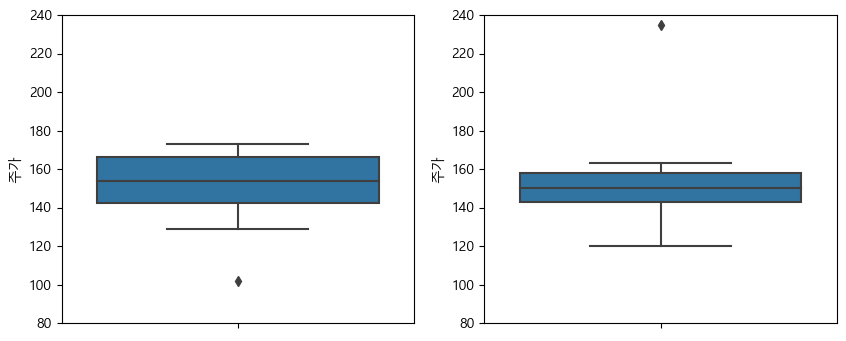

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sb.boxplot(data=df2_1, y="주가", ax=ax1)
sb.boxplot(data=df2_2, y="주가", ax=ax2)
ax1.set_ylim(80, 240)
ax2.set_ylim(80, 240)
plt.show()
plt.close()

### 데이터 프레임을 새로 생성해서 분석하는 경우

In [10]:
df2_final = DataFrame({"K": df2_1['주가'], "F": df2_2['주가']})
df2_final

,K,F
0,165,120
1,147,144
2,135,147
3,161,235
4,102,161
5,165,139
6,170,150
7,173,157
8,173,139
9,145,150


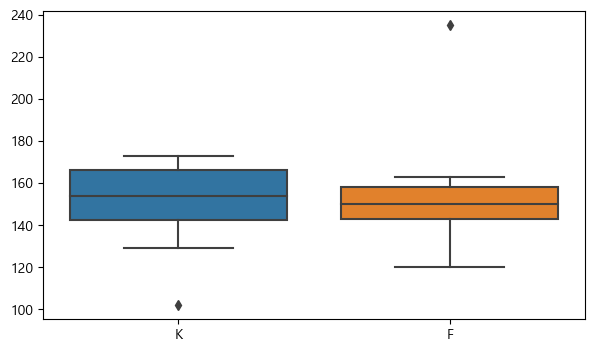

In [11]:
plt.figure()
sb.boxplot(data=df2_final)
plt.show()
plt.close()

### 알 수 있는 사실

1. 주가의 변동 폭은 `F`보다 `K`가 더 크다.
1. `K`는 폭락 지점이 보이고, `F`는 상승 지점이 보인다.

## 문제 3

### 데이터 가져오기

In [12]:
df3 = read_excel("https://data.hossam.kr/D02/grape.xlsx")
df3

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [13]:
df3_1 = df3.query("비료종류=='A'")
df3_1.set_index('비료종류', inplace=True)
df3_1

,수확량
비료종류,
A,39.3
A,26.6
A,23.7
A,28.5
A,24.2
A,17.9
A,24.3


In [14]:
df3_2 = df3.query("비료종류=='B'")
df3_2.set_index('비료종류', inplace=True)
df3_2

,수확량
비료종류,
B,11.4
B,25.8
B,16.5
B,21.1


In [15]:
desc1 = df3_1.describe()
desc2 = df3_2.describe()
merge(desc1, desc2, left_index=True, right_index=True, suffixes=('_A', '_B'))

,수확량_A,수확량_B
count,7.000000,4.00000
mean,26.357143,18.70000
std,6.578211,6.17252
min,17.900000,11.40000
25%,23.950000,15.22500
50%,24.300000,18.80000
75%,27.550000,22.27500
max,39.300000,25.80000


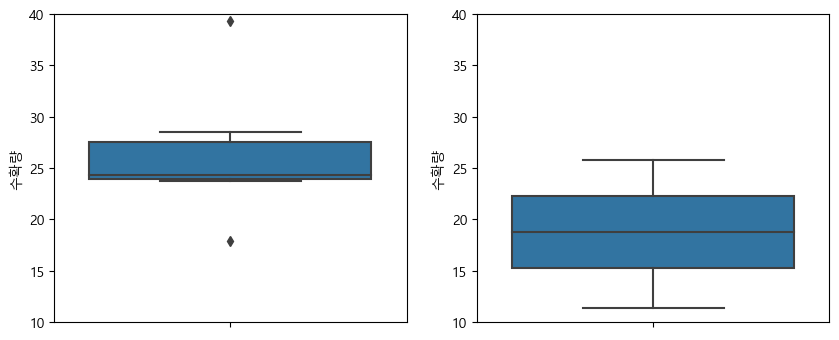

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sb.boxplot(data=df3_1, y="수확량", ax=ax1)
sb.boxplot(data=df3_2, y="수확량", ax=ax2)
ax1.set_ylim(10, 40)
ax2.set_ylim(10, 40)
plt.show()
plt.close()

### 알 수 있는 사실

1. 평균값을 비교 했을 때 A 비료를 사용하는 것이 B를 사용하는 것 보다 더 많은 수확량을 보인다.
2. 수확량 분포는 B 비료를 사용하는 것이 더 넓게 분포된 것으로 보아 A를 사용하는 것이 더 안정적이다.

## 문제 4

### 데이터 가져오기

In [17]:
df4 = read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
df4

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


### 그룹별 데이터 

In [18]:
df4_1 = df4.query("학과=='A'")
df4_1.reset_index(drop=True, inplace=True)
df4_1.describe()

,점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [19]:
df4_2 = df4.query("학과=='C'")
df4_2.reset_index(drop=True, inplace=True)
df4_2.describe()

,점수
count,12.000000
mean,56.166667
std,14.689720
min,41.000000
25%,50.250000
50%,52.500000
75%,54.250000
max,90.000000


### 상자그림

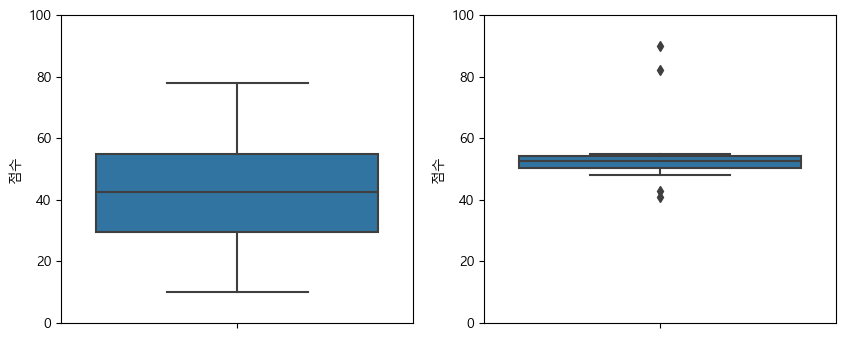

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sb.boxplot(data=df4_1, y="점수", ax=ax1)
sb.boxplot(data=df4_2, y="점수", ax=ax2)
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
plt.show()
plt.close()

### 알 수 있는 사실

1. 학생 정원은 A학과가 20명, C학과가 12명이다.
2. 학생들의 점수는 A학과의 경우 10~78점까지이고,
   ㅊ학과는 41점~90점까지 이다. 
3. 평균 점수는 C학과가 더 높다.
4. 사분위 수의 분포로 A학과보다 C학과 학생들의 학업 성취도가 더 높다.

## 문제 5

### 데이터 가져오기

In [21]:
df5 = read_excel("https://data.hossam.kr/D02/stat_comp_grade.xlsx")
df5

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


### (1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

In [22]:
df5['전공'] = np.where(df5['전공'] == 'STAT', 1, 2)
df5['전공'] = df5['전공'].astype('category')
df5

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


### (2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

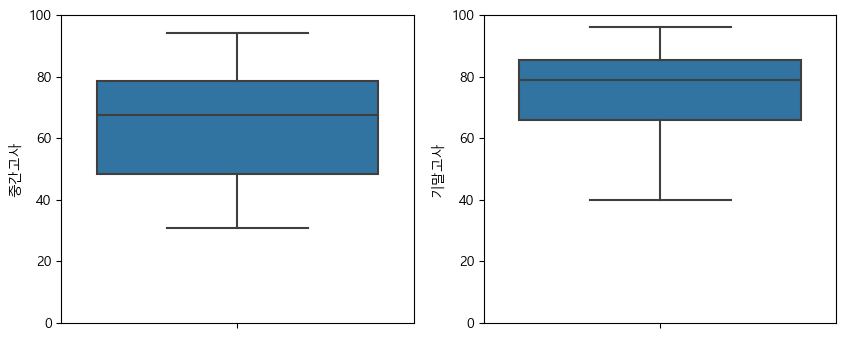

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sb.boxplot(data=df5, y="중간고사", ax=ax1)
sb.boxplot(data=df5, y="기말고사", ax=ax2)
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
plt.show()
plt.close()

In [24]:
df5.describe()

,중간고사,기말고사
count,20.000000,20.000000
mean,65.150000,75.650000
std,19.647619,15.597824
min,31.000000,40.000000
25%,48.500000,66.000000
50%,67.500000,79.000000
75%,78.500000,85.250000
max,94.000000,96.000000


> 전반적으로 중간고사 점수보다 기말고사 점수가 높다.

### (3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [25]:
hist1, bins1 = np.histogram(df5['중간고사'], bins=5)
bins1 = np.round(bins1, 1)
bins1

array([31. , 43.6, 56.2, 68.8, 81.4, 94. ])

In [26]:
hist2, bins2 = np.histogram(df5['기말고사'], bins=5)
bins2 = np.round(bins2, 1)
bins2

array([40. , 51.2, 62.4, 73.6, 84.8, 96. ])

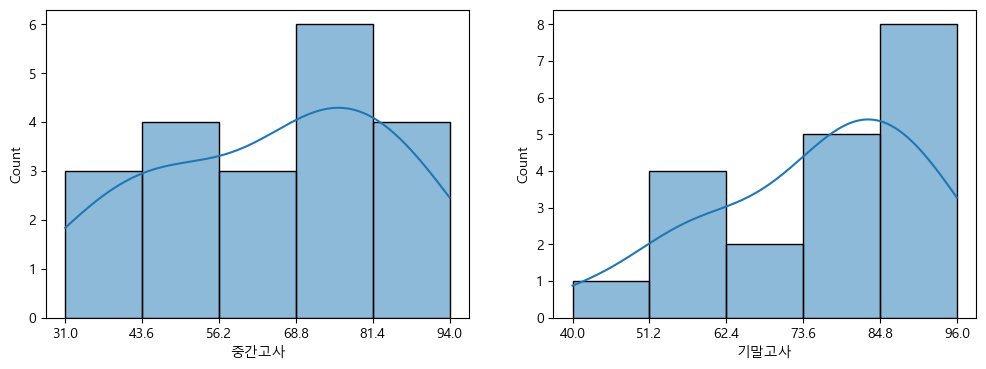

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sb.histplot(data=df5, x="중간고사", bins=5, ax=ax1, kde=True)
sb.histplot(data=df5, x="기말고사", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(bins1)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)
plt.show()
plt.close()

> 분포곡선으로 보아 기말고사에서 성적이 오른 학생이 존재한다.

### (4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [28]:
STAT_df = df5.query("전공==1")
STAT_df

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
7,1,47,57
8,1,94,82
10,1,38,53
11,1,65,70
12,1,47,60
13,1,88,95
16,1,92,95


In [29]:
COMP_df = df5.query("전공==2")
COMP_df

,전공,중간고사,기말고사
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
9,2,49,57
14,2,80,85
15,2,87,90
19,2,76,85


In [30]:
bins_list = [0, 20, 40, 60, 80, 100]

In [31]:
stat_hist1, stat_bins1 = np.histogram(STAT_df['중간고사'], bins=bins_list)
stat_bins1 = np.round(stat_bins1, 1)
stat_bins1

array([  0,  20,  40,  60,  80, 100])

In [32]:
stat_hist2, stat_bins2 = np.histogram(STAT_df['기말고사'], bins=bins_list)
stat_bins2 = np.round(stat_bins2, 1)
stat_bins2

array([  0,  20,  40,  60,  80, 100])

In [33]:
compu_hist1, compu_bins1 = np.histogram(STAT_df['중간고사'], bins=bins_list)
compu_bins1 = np.round(compu_bins1, 1)
compu_bins1

array([  0,  20,  40,  60,  80, 100])

In [34]:
compu_hist2, compu_bins2 = np.histogram(STAT_df['기말고사'], bins=bins_list)
compu_bins2 = np.round(compu_bins2, 1)
compu_bins2

array([  0,  20,  40,  60,  80, 100])

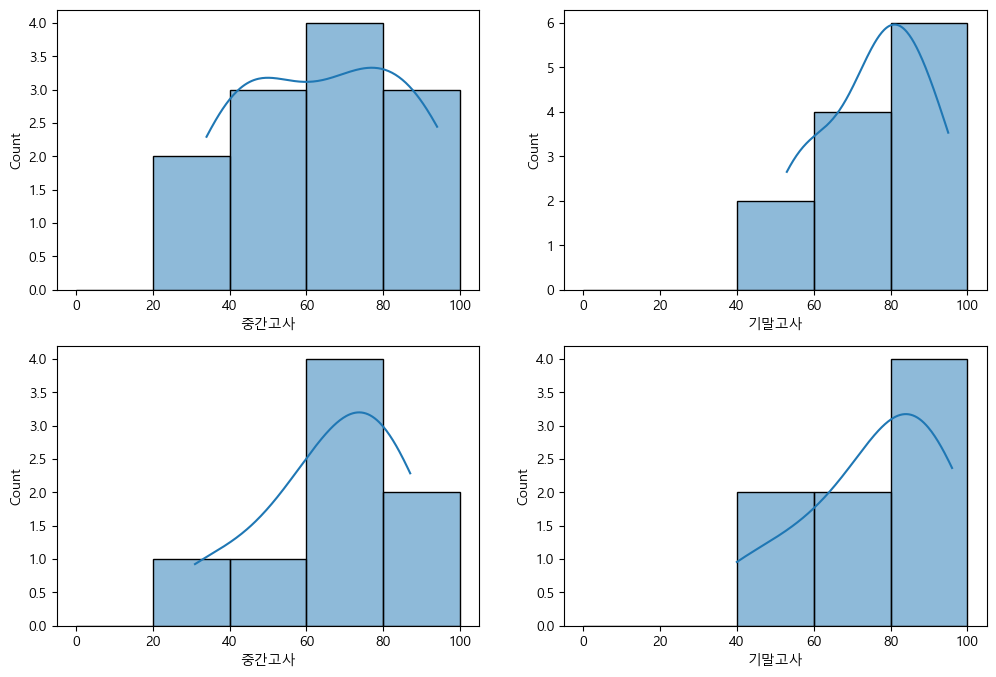

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

sb.histplot(data=STAT_df, x="중간고사", bins=bins_list, ax=ax1, kde=True)
ax1.set_xticks(stat_bins1)
ax1.set_xticklabels(stat_bins1)

sb.histplot(data=STAT_df, x="기말고사", bins=bins_list, ax=ax2, kde=True)
ax2.set_xticks(stat_bins2)
ax2.set_xticklabels(stat_bins2)

sb.histplot(data=COMP_df, x="중간고사", bins=bins_list, ax=ax3, kde=True)
ax3.set_xticks(compu_bins1)
ax3.set_xticklabels(compu_bins1)

sb.histplot(data=COMP_df, x="기말고사", bins=bins_list, ax=ax4, kde=True)
ax4.set_xticks(compu_bins2)
ax4.set_xticklabels(compu_bins2)

plt.show()
plt.close()

> 통계학은 전반적으로 학생들의 점수가 고르게 분포되어 있지만 컴퓨터과의 경우 고득점자 그룹이 존재하는 것으로 나타났다.